In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker

from mpl_toolkits import axes_grid1

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [2]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [3]:
LA_lat = 34.0522; region='Los Angeles'
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

region_lat = LA_lat
region_lon = LA_lon

In [4]:
file_dir = '/ninod/NCAR_LENS/daily/PRECT/B1850C5CN/'

file = 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-22001231_SUBSET.nc'

In [ ]:
start_year = 402
end_year = 2200

ncfile = netCDF4.Dataset(file_dir + file)
PRECT_lat = ncfile.variables['lat'][:]
PRECT_lon = ncfile.variables['lon'][:]
PRECT_time_var = ncfile.variables['time']

PRECT_time_dates = netCDF4.num2date(PRECT_time_var[:], PRECT_time_var.units, PRECT_time_var.calendar)
time_indices_ONDJFM = numpy.array([(t.month in [10,11,12,1,2,3])&(t.year in range(start_year, end_year+1)) for t in PRECT_time_dates], dtype=bool)
PRECT_time_dates_ONDJFM = PRECT_time_dates[time_indices_ONDJFM]

#region_lat_idx = geo_idx(region_lat, PRECT_lat)
#region_lon_idx = geo_idx(region_lon, PRECT_lon)

#PRECT_ONDJFM_region = ncfile.variables['PRECT'][time_indices_ONDJFM, region_lat_idx, region_lon_idx]*86400.*1000

Oroville_dam_lat_idx = geo_idx(Oroville_dam_lat, PRECT_lat)
Oroville_dam_lon_idx = geo_idx(Oroville_dam_lon, PRECT_lon)
PRECT_ONDJFM_Oroville_dam = ncfile.variables['PRECT'][time_indices_ONDJFM, Oroville_dam_lat_idx, Oroville_dam_lon_idx]*86400.*1000

SF_lat_idx = geo_idx(SF_lat, PRECT_lat)
SF_lon_idx = geo_idx(SF_lon, PRECT_lon)
PRECT_ONDJFM_SF = ncfile.variables['PRECT'][time_indices_ONDJFM, SF_lat_idx, SF_lon_idx]*86400.*1000

LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
LA_lon_idx = geo_idx(LA_lon, PRECT_lon)
PRECT_ONDJFM_LA = ncfile.variables['PRECT'][time_indices_ONDJFM, LA_lat_idx, LA_lon_idx]*86400.*1000

In [9]:
# only retain precipitation days
threshold=0.1

In [13]:
PRECT_ONDJFM_region = PRECT_ONDJFM_LA
PRECT_ONDJFM_region_threshold = PRECT_ONDJFM_region[PRECT_ONDJFM_region>threshold]

#bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_region_threshold.max()),100) # log spaced bins
bins = numpy.linspace(threshold,PRECT_ONDJFM_region_threshold.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_region_threshold, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

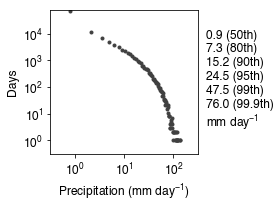

In [14]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)
#ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, hist_histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

#ax.set_ylim(0.5,30000)
ax.set_ylim(10**-0.5,10**4.9)
#ax.set_xticks([10**-0.5,10**0,10**1,10**2])
ax.set_xlim(10**-0.5, 10**2.5)

ax.minorticks_off()
ax.set_axisbelow(True)

#ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))
#ax.set_xticks([0,25,50,75,100,125,150])

#ax_right = ax.twinx()
#ax_min, ax_max = ax.get_ylim()
#ax_right.set_yticks([1,2,3,4,5,10])
#ax_right.tick_params(labelsize=fontsize)
#ax_right.set_ylim(numpy.log(ax_min), numpy.log(ax_max))

perc50 = numpy.percentile(PRECT_ONDJFM_region_threshold, 50)
perc75 = numpy.percentile(PRECT_ONDJFM_region_threshold, 75)
perc80 = numpy.percentile(PRECT_ONDJFM_region_threshold, 80)
perc90 = numpy.percentile(PRECT_ONDJFM_region_threshold, 90)
perc95 = numpy.percentile(PRECT_ONDJFM_region_threshold, 95)
perc99 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99)
perc999 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'

#divider = axes_grid1.make_axes_locatable(ax)
#ax_text = divider.append_axes('right', pad=0.05, size='15%')
#ax_text.text(s=perc_text, y=1.0, x=0.0, transform=ax_text.transAxes, ha='left', va='top', fontsize=fontsize)

ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)

#import make_axes_locatable
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.05)

fig.tight_layout()

#mp.savefig('single_realization_preindustrial.pdf', transparent=True, bbox_inches='tight')

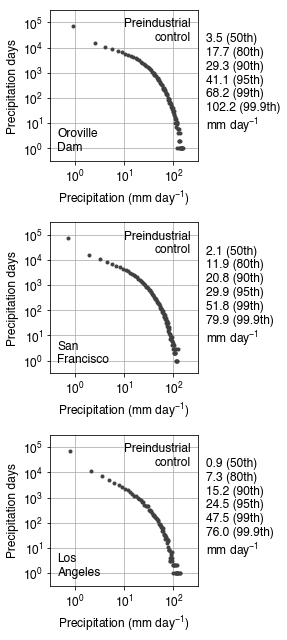

In [39]:
fig = mp.figure(figsize=(3,9))
fontsize=12


# OROVILLE

PRECT_ONDJFM_region_threshold = PRECT_ONDJFM_Oroville_dam[PRECT_ONDJFM_Oroville_dam>threshold]
bins = numpy.linspace(0.1,PRECT_ONDJFM_region_threshold.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_region_threshold, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(311)
#ax.bar(bin_centers, hist_histogram, align='center', width=bin_width, color='0.5', edgecolor='0.25', label='historical')
ax.scatter(bin_centers, hist_histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Precipitation days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**5.5)
ax.set_xlim(10**-0.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4,10**5])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(PRECT_ONDJFM_region_threshold, 50)
perc75 = numpy.percentile(PRECT_ONDJFM_region_threshold, 75)
perc80 = numpy.percentile(PRECT_ONDJFM_region_threshold, 80)
perc90 = numpy.percentile(PRECT_ONDJFM_region_threshold, 90)
perc95 = numpy.percentile(PRECT_ONDJFM_region_threshold, 95)
perc99 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99)
perc999 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Oroville\nDam', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)






# San Francisco

PRECT_ONDJFM_region_threshold = PRECT_ONDJFM_SF[PRECT_ONDJFM_SF>threshold]
bins = numpy.linspace(0.1,PRECT_ONDJFM_region_threshold.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_region_threshold, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(312)

ax.scatter(bin_centers, hist_histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Precipitation days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**5.5)
ax.set_xlim(10**-0.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4,10**5])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(PRECT_ONDJFM_region_threshold, 50)
perc75 = numpy.percentile(PRECT_ONDJFM_region_threshold, 75)
perc80 = numpy.percentile(PRECT_ONDJFM_region_threshold, 80)
perc90 = numpy.percentile(PRECT_ONDJFM_region_threshold, 90)
perc95 = numpy.percentile(PRECT_ONDJFM_region_threshold, 95)
perc99 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99)
perc999 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='San\nFrancisco', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

# Los Angeles

PRECT_ONDJFM_region_threshold = PRECT_ONDJFM_LA[PRECT_ONDJFM_LA>threshold]
bins = numpy.linspace(0.1,PRECT_ONDJFM_region_threshold.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_region_threshold, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax = fig.add_subplot(313)

ax.scatter(bin_centers, hist_histogram, color='0.25', label='historical', marker='.')
ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Precipitation days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**5.5)
ax.set_xlim(10**-0.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4,10**5])

ax.grid()
ax.minorticks_off()
ax.set_axisbelow(True)

perc50 = numpy.percentile(PRECT_ONDJFM_region_threshold, 50)
perc75 = numpy.percentile(PRECT_ONDJFM_region_threshold, 75)
perc80 = numpy.percentile(PRECT_ONDJFM_region_threshold, 80)
perc90 = numpy.percentile(PRECT_ONDJFM_region_threshold, 90)
perc95 = numpy.percentile(PRECT_ONDJFM_region_threshold, 95)
perc99 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99)
perc999 = numpy.percentile(PRECT_ONDJFM_region_threshold, 99.9)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)

mp.tight_layout()#h_pad=1.5)

mp.savefig('./figs/histogram_loglog_preindustrial_threshold_'+'{:.1f}'.format(threshold)+'mmday_3plot.pdf', transparent=True, bbox_inches='tight')

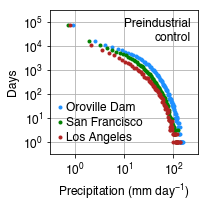

In [35]:
fig = mp.figure(figsize=(3,3))
fontsize=12
ax = fig.add_subplot(111)

# OROVILLE

PRECT_ONDJFM_region_threshold = PRECT_ONDJFM_Oroville_dam[PRECT_ONDJFM_Oroville_dam>threshold]
bins = numpy.linspace(threshold,PRECT_ONDJFM_region_threshold.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_region_threshold, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, hist_histogram, marker='.', color='dodgerblue', label='Oroville Dam')

# San Francisco

PRECT_ONDJFM_region_threshold = PRECT_ONDJFM_SF[PRECT_ONDJFM_SF>threshold]
bins = numpy.linspace(threshold,PRECT_ONDJFM_region_threshold.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_region_threshold, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]
ax.scatter(bin_centers, hist_histogram, marker='.', color='green', label='San Francisco')

# Los Angeles

PRECT_ONDJFM_region_threshold = PRECT_ONDJFM_LA[PRECT_ONDJFM_LA>threshold]
bins = numpy.linspace(threshold,PRECT_ONDJFM_region_threshold.max(),100) # linearly spaced bins
hist_histogram, bin_edges = numpy.histogram(PRECT_ONDJFM_region_threshold, bins=bins, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

ax.scatter(bin_centers, hist_histogram, marker='.', color='firebrick', label='Los Angeles')

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Days', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm day$^{-1}$)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.set_xscale('log')

ax.set_ylim(10**-0.5,10**5.5)
ax.set_xlim(10**-0.5, 10**2.5)
ax.set_yticks([10**0,10**1,10**2,10**3,10**4,10**5])

ax.minorticks_off()
ax.grid()
ax.set_axisbelow(True)

perc_text = \
'{:.1f}'.format(perc50) + ' (50th)\n' + \
'{:.1f}'.format(perc80) + ' (80th)\n' + \
'{:.1f}'.format(perc90) + ' (90th)\n' + \
'{:.1f}'.format(perc95) + ' (95th)\n' + \
'{:.1f}'.format(perc99) + ' (99th)\n' + \
'{:.1f}'.format(perc999) + ' (99.9th)\n' + \
'mm day$^{-1}$'
#ax.text(s=perc_text, y=0.50, x=1.05, transform=ax.transAxes, ha='left', va='center', fontsize=fontsize)
#ax.text(s='Los\nAngeles', y=0.05, x=0.05, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.05,0.05), \
          bbox_transform=ax.transAxes, loc='lower left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

ax.text(s='Preindustrial\ncontrol', y=0.95, x=0.95, transform=ax.transAxes, ha='right', va='top', fontsize=fontsize)
mp.tight_layout()

mp.savefig('./figs/histogram_loglog_preindustrial_threshold_'+'{:.1f}'.format(threshold)+'mmday_1plot.pdf', transparent=True, bbox_inches='tight')